# Bukas Use Case Optimization

## Overview

__Use Case__: Loan Application
<br>__Objective__: A user decides to apply for a loan
<br>__Users__ (as observed in clustering the applicants):

1. Working students or professionals
2. Student with Guarantor
3. Parents or Guardians

__Main Success Scenario__

1. It begins when a user is interested in an educational loan.
2. The system displays the educational loans.
3. The user clicks on the "Apply for a Student Loan" button.
4. If the user is not yet registered, the system will redirect the user to the user registration page.
5. If the user is registered, it will redirected to the loan application form.
6. The system sends email confirmation to the user.
7. The company will call the user for verification and confirm application.
8. The company will decide if the application is approved or not.
9. The system will send a confirmation email to the user.
10. The user will have an access to see the loan application status.

In [3]:
#Standard and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Inspect Data

In [63]:
df = pd.read_csv('Bukas_Dataset_Cleaned.csv')

In [45]:
df.head()

,applicant_id,borrower_city_id,borrower_date_of_birth,borrower_province_id,datetime_created,datetime_updated,education_course,guarantor_gross_monthly_salary,guarantor_relationship_to_borrower,requested_debt_to_burden_ratio,requested_monthly_interest_rate,requested_monthly_repayment,requested_origination_rate,requested_principal,requested_tenor,requested_total_balance,requested_total_interest_fee,requested_total_interest_rate,requested_total_origination_fee,status
0,1,Santa Rosa,7/22/71,Laguna,2019-04-24,2019-05-08,Architecture,0.0,NaN,1.0,0.015,10.0833,0.03,100.0,12,121.0,18.0,0.18,3.0,NEW
1,2,NaN,NaN,NaN,2019-04-24,2019-05-08,NaN,0.0,NaN,1.0,0.015,0.0000,0.03,0.0,12,0.0,0.0,0.18,0.0,NEW
2,3,Sampaloc,12/4/00,NCR I,2019-04-24,2019-05-08,NaN,0.0,NaN,1.0,0.015,4033.3333,0.03,40000.0,12,48400.0,7200.0,0.18,1200.0,NEW
3,4,Dasmariñas,1/31/03,Cavite,2019-04-24,2019-05-08,NaN,0.0,NaN,1.0,0.015,10083.3333,0.03,100000.0,12,121000.0,18000.0,0.18,3000.0,NEW
4,5,NaN,NaN,NaN,2019-04-24,2019-05-08,NaN,0.0,NaN,1.0,0.015,0.0000,0.03,0.0,12,0.0,0.0,0.18,0.0,NEW


In [46]:
df.describe()

,applicant_id,guarantor_gross_monthly_salary,requested_debt_to_burden_ratio,requested_monthly_interest_rate,requested_monthly_repayment,requested_origination_rate,requested_principal,requested_tenor,requested_total_balance,requested_total_interest_fee,requested_total_interest_rate,requested_total_origination_fee
count,2273.000000,2.273000e+03,2273.000000,2.273000e+03,2273.000000,2.273000e+03,2.273000e+03,2273.0,2.273000e+03,2.273000e+03,2.273000e+03,2273.000000
mean,1137.000000,7.693784e+03,1.517362,1.500000e-02,3540.705371,3.000000e-02,3.511443e+04,12.0,4.248846e+04,6.320598e+03,1.800000e-01,1053.433003
std,656.302903,5.290174e+04,22.682863,4.008093e-16,20583.868581,8.016186e-16,2.041375e+05,0.0,2.470064e+05,3.674476e+04,5.691145e-15,6124.126190
min,1.000000,0.000000e+00,0.000100,1.500000e-02,0.000000,3.000000e-02,0.000000e+00,12.0,0.000000e+00,0.000000e+00,1.800000e-01,0.000000
25%,569.000000,0.000000e+00,1.000000,1.500000e-02,0.000000,3.000000e-02,0.000000e+00,12.0,0.000000e+00,0.000000e+00,1.800000e-01,0.000000
50%,1137.000000,0.000000e+00,1.000000,1.500000e-02,1512.500000,3.000000e-02,1.500000e+04,12.0,1.815000e+04,2.700000e+03,1.800000e-01,450.000000
75%,1705.000000,0.000000e+00,1.000000,1.500000e-02,4033.333300,3.000000e-02,4.000000e+04,12.0,4.840000e+04,7.200000e+03,1.800000e-01,1200.000000
max,2273.000000,2.000000e+06,957.916600,1.500000e-02,877138.780800,3.000000e-02,8.698897e+06,12.0,1.052567e+07,1.565801e+06,1.800000e-01,260966.910000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 20 columns):
applicant_id                          2273 non-null int64
borrower_city_id                      1285 non-null object
borrower_date_of_birth                1398 non-null object
borrower_province_id                  1285 non-null object
datetime_created                      2273 non-null object
datetime_updated                      2273 non-null object
education_course                      923 non-null object
guarantor_gross_monthly_salary        2273 non-null float64
guarantor_relationship_to_borrower    538 non-null object
requested_debt_to_burden_ratio        2273 non-null float64
requested_monthly_interest_rate       2273 non-null float64
requested_monthly_repayment           2273 non-null float64
requested_origination_rate            2273 non-null float64
requested_principal                   2273 non-null float64
requested_tenor                       2273 non-null int64
reques

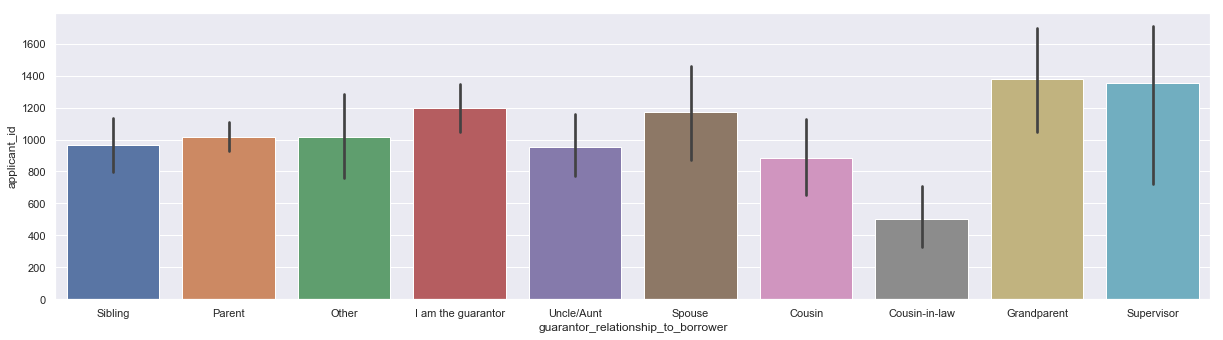

In [51]:
# Relationship to the borrower 
sns.barplot(x="guarantor_relationship_to_borrower", y="applicant_id", data=df)
sns.set(rc={'figure.figsize':(20.7,5.27)})

__Observation:__ Personas of the Applicants can be divided into 3 categories

1. __Student with Guarantor__: Those who have guarantors like Sibling, Parent, Uncle/Aunt, Spouse, Cousin, Cousin-in-law, Grandparent, Supervisor
2. __Working Student or Professional__: I am the guarantor
3. __Parents or Guardian__: Other

In [49]:
# Drop irrelevant columns

df.drop(columns=['requested_debt_to_burden_ratio', 'requested_monthly_interest_rate',\
                'requested_monthly_repayment','requested_origination_rate',\
                'requested_principal','requested_tenor','requested_total_balance',\
                'requested_total_interest_fee','requested_total_interest_rate',\
                'requested_total_origination_fee'])

,applicant_id,borrower_city_id,borrower_date_of_birth,borrower_province_id,datetime_created,datetime_updated,education_course,guarantor_gross_monthly_salary,guarantor_relationship_to_borrower,status
0,1,Santa Rosa,7/22/71,Laguna,2019-04-24,2019-05-08,Architecture,0.0,NaN,NEW
1,2,NaN,NaN,NaN,2019-04-24,2019-05-08,NaN,0.0,NaN,NEW
2,3,Sampaloc,12/4/00,NCR I,2019-04-24,2019-05-08,NaN,0.0,NaN,NEW
3,4,Dasmariñas,1/31/03,Cavite,2019-04-24,2019-05-08,NaN,0.0,NaN,NEW
4,5,NaN,NaN,NaN,2019-04-24,2019-05-08,NaN,0.0,NaN,NEW
5,6,NaN,NaN,NaN,2019-04-24,2019-05-08,NaN,0.0,NaN,NEW
6,7,Pasay City,4/9/00,NCR IV,2019-04-24,2019-05-08,NaN,0.0,NaN,NEW
7,8,Infanta,10/3/97,Quezon,2019-04-24,2019-05-08,NaN,0.0,Sibling,INITIAL_OFFER_ACCEPTED
8,9,Muntinlupa,9/21/99,NCR IV,2019-04-25,2019-05-08,Chemical Engineering,0.0,NaN,NEW
9,10,Tondo,4/14/84,NCR I,2019-04-25,2019-05-08,Electrical Engineering,0.0,NaN,NEW


In [59]:
df.shape

(2273, 20)

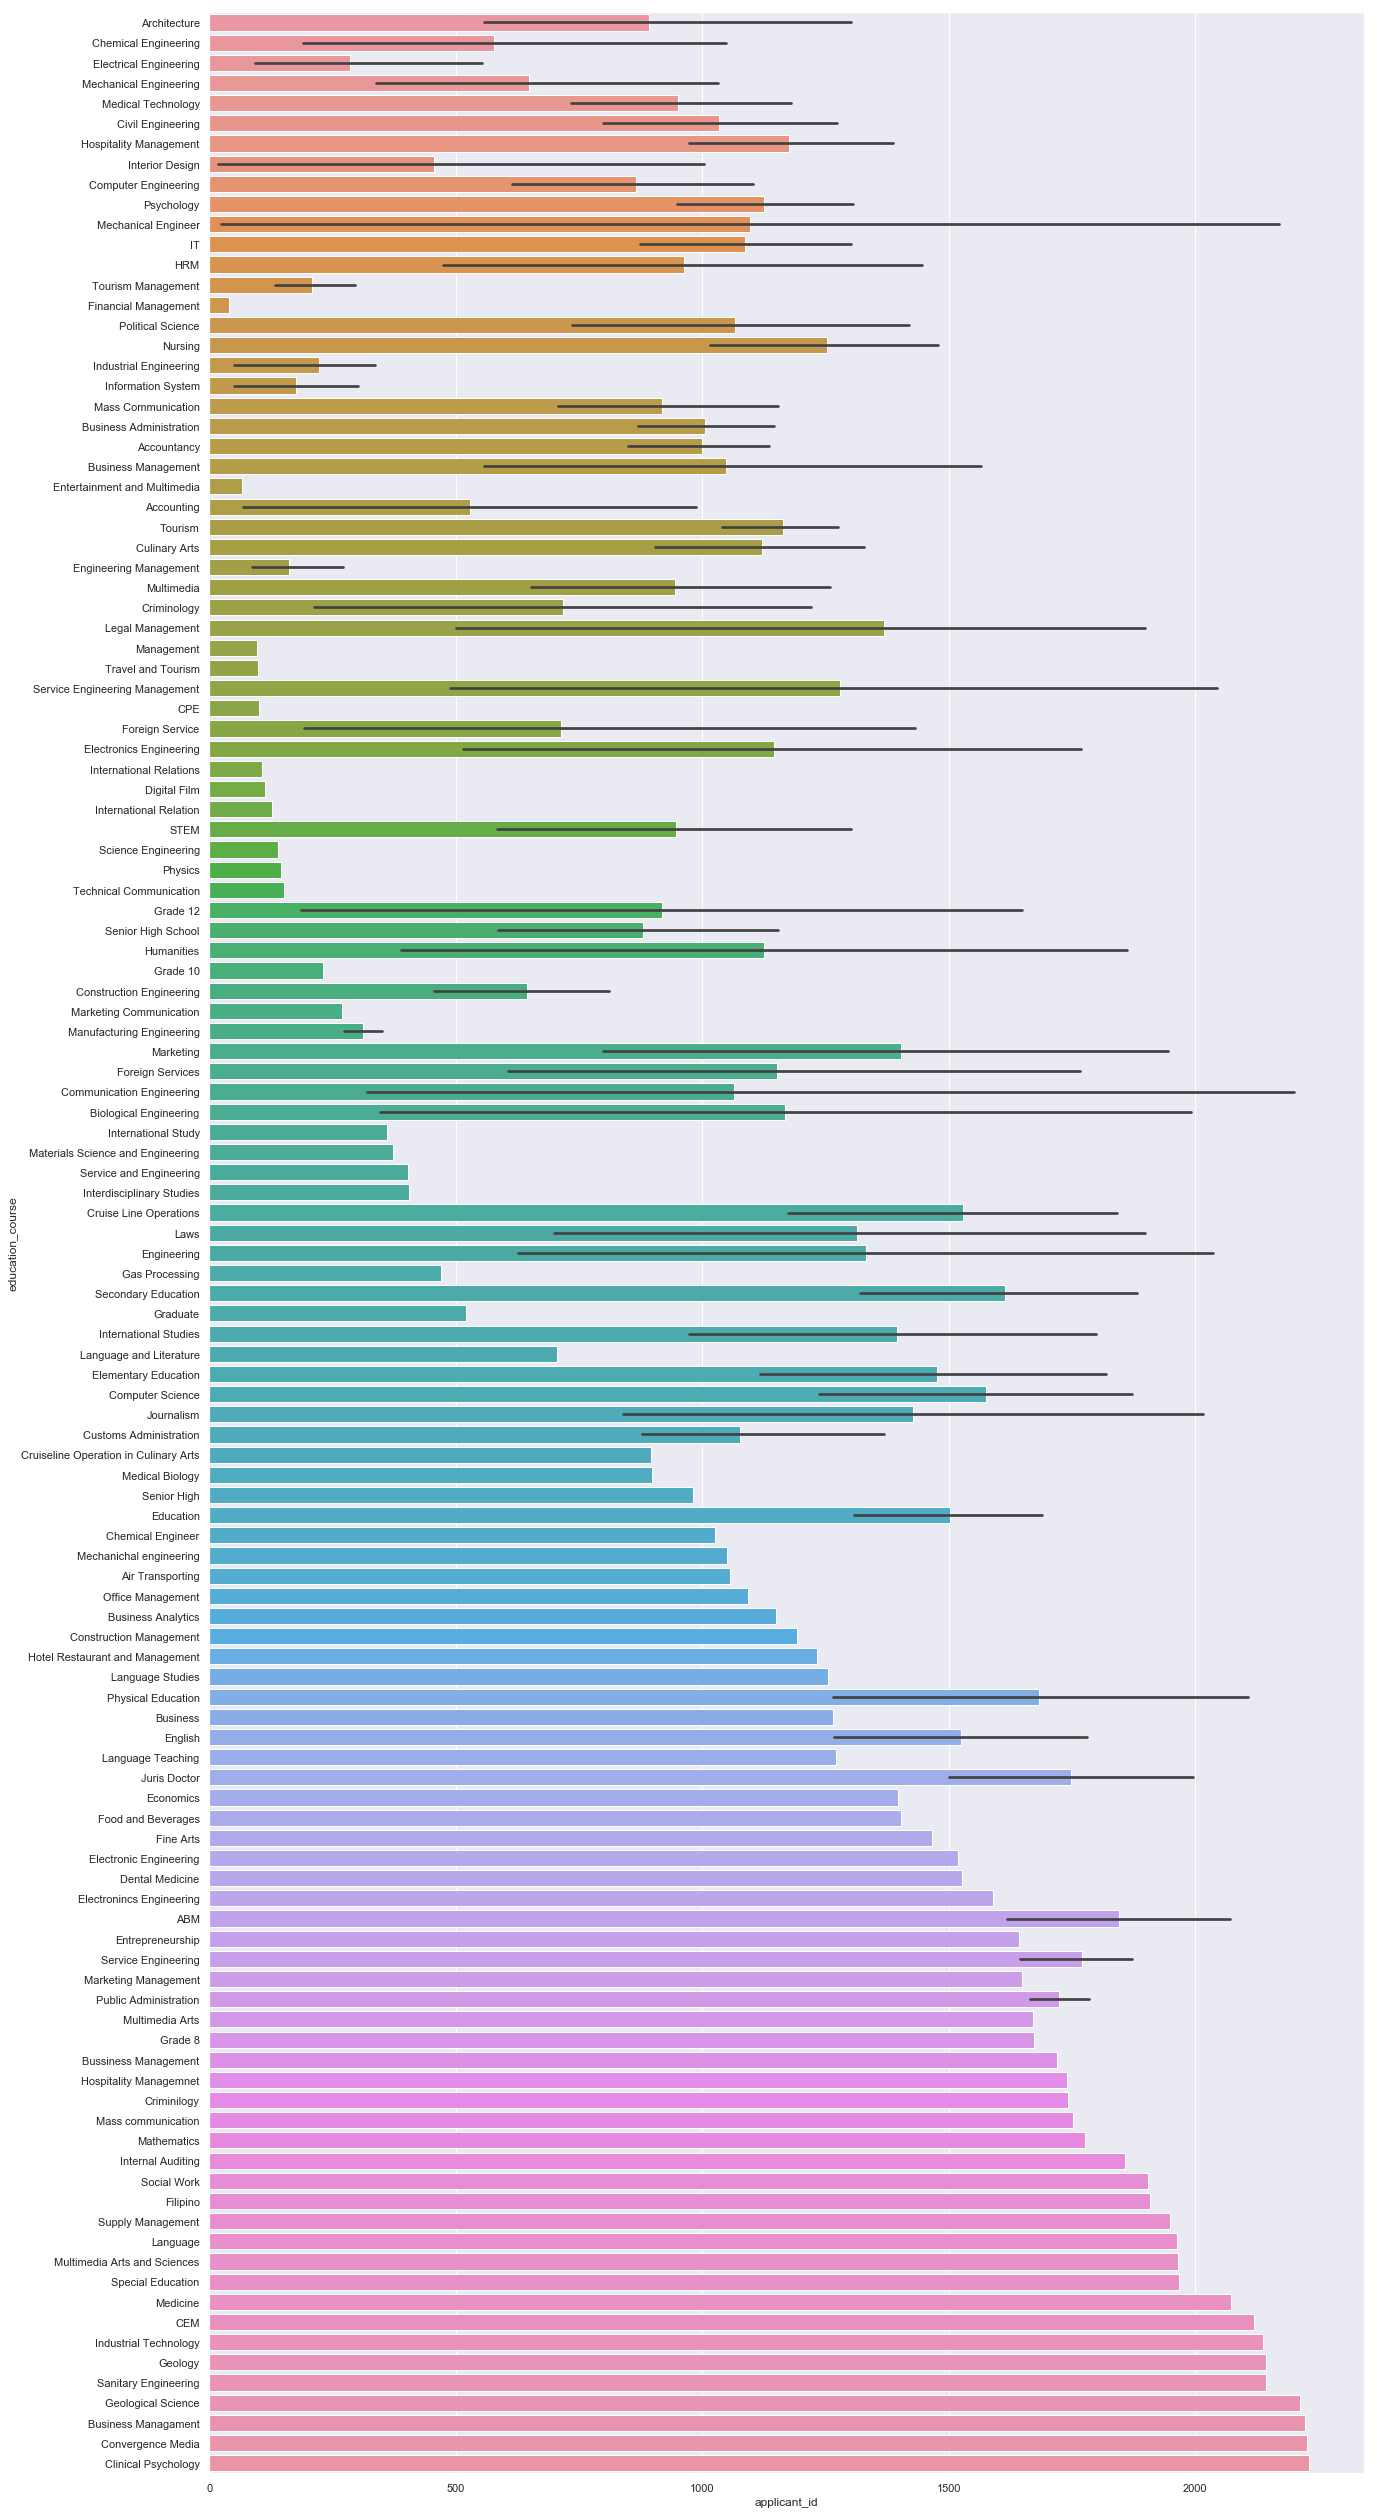

In [64]:
# Top 3 Courses of Choice 
sns.barplot(x="applicant_id", y="education_course", data=df)
sns.set(rc={'figure.figsize':(20.7,45.27)})